# SIFT Implementation 

This notebook is a walkthrough of an implementation of the SIFT algorithm. For detail on the code please see the .py files in the directory. This notebook merely summarises the results.

## Setup

A disclaimer on the modules:
* cv2 is used only for warping the image at the end.
* scipy is used in the keypoint_detector class, for convolution, minimun and maximum filtering, and some statistics.
* skimage is used to resize images.


There are a few scripts to import:
* keypoint_detector: the keypoint detector with descriptors.
* utility: mainly plotting functions for validation purposes.
* ransac_without_descriptor: ransac without descriptors algorithm.
* ransac_with_descriptor: ransac with descriptors algorithm.

In [1]:
#standard modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

#custom modules
from keypoint_detector import keypoint_detector
import utility as ut
import ransac_with_descriptor as rs
import ransac_without_descriptor as rsc

## Example 1 - Translation Only

For the first example, let us consider two images where there is translation only. This will test whether the detector can handle a simple case. 

Suppose we have sliced the famous 'Lena' in half by accident and need to reconstruct the image.

(-0.5, 249.5, 511.5, -0.5)

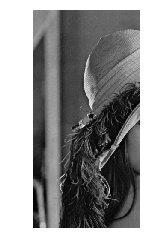

In [30]:
#Left side:
image_1 = plt.imread(r'../images/lena_left.tif')
plt.imshow(image_1)
plt.axis('off')

(-0.5, 361.5, 511.5, -0.5)

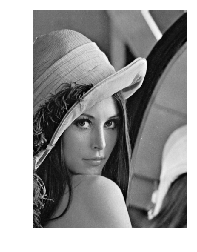

In [31]:
#Right side
image_2 = plt.imread(r'../images/lena_right.tif')
plt.imshow(image_2)
plt.axis('off')

Observe that there is some overlap between the images. We want to reconstruct using the features found in this overlap.

Running SIFT is simple, but in this example each step will be run in its own cell to familiarise the user.

In [32]:
#initialise the detector using detector class
#you can set the number of octaves and levels in the octave here
lena_left = keypoint_detector(image_1, number_of_octaves = 4, number_of_k_per_octave = 12)

In [33]:
#now we can identify the keypoints and build the descriptors
lena_left.get_keypoints()


Finding keypoints for channel: 0...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 32% complete. 
Keypoint evaluation 64% complete. 
Keypoint evaluation 96% complete. 

There were 6 contrast rejected keypoints.
There were 15376 edge rejected keypoints.
After localisation there were 263 keypoints. 


Finding keypoints for channel: 1...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 32% complete. 
Keypoint evaluation 64% complete. 
Keypoint evaluation 96% complete. 

There were 6 contrast rejected keypoints.
There were 15376 edge rejected keypoints.
After localisation there were 263 keypoints. 


Finding keypoints for channel: 2...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 32% complete. 
Keypoint evaluation 64% complete. 
Keypoint evaluation 96% complete. 

There were 6 contrast rejected keypoints.
There were 15376 edge rejected keypoints.
After localisation there were 263 keypoints. 




In [34]:
#here are the keypoints with descriptors
lena_left_kp = lena_left.keypoints_scaled
#hint: the structure of the keypoints are:
#(octave, level in octave, x, y, channel, orientation, descriptor)
lena_left_kp[0]

(1,
 1,
 119,
 182,
 0,
 12,
 array([0.        , 0.        , 0.        , 0.2962963 , 0.7037037 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24      , 0.44      , 0.32      ,
        0.        , 0.        , 0.        , 0.1875    , 0.        ,
        0.        , 0.        , 0.0625    , 0.75      , 0.        ,
        0.22222222, 0.44444444, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.19230769, 0.23076923, 0.57692308, 0.        , 0.        ,
        0.23809524, 0.76190476, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4       , 0.6       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03125   , 0.96875   , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48484848,

In [35]:
#lets do the same for the second picture
lena_right = keypoint_detector(image_2, number_of_octaves = 4, number_of_k_per_octave = 12)
lena_right.get_keypoints()
lena_right_kp = lena_right.keypoints_scaled


Finding keypoints for channel: 0...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 24% complete. 
Keypoint evaluation 47% complete. 
Keypoint evaluation 70% complete. 
Keypoint evaluation 93% complete. 

There were 5 contrast rejected keypoints.
There were 21299 edge rejected keypoints.
After localisation there were 360 keypoints. 


Finding keypoints for channel: 1...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 24% complete. 
Keypoint evaluation 47% complete. 
Keypoint evaluation 70% complete. 
Keypoint evaluation 93% complete. 

There were 5 contrast rejected keypoints.
There were 21299 edge rejected keypoints.
After localisation there were 360 keypoints. 


Finding keypoints for channel: 2...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 24% complete. 
Keypoint evaluation 47% complete. 
Keypoint evaluation 70% complete. 
Keypoint evaluation 93% complete. 

There were 5 contrast rejec

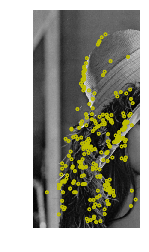

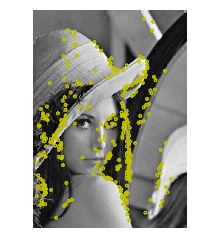

In [36]:
#lets take a look at some of the keypoints
ut.plot_keypoints(lena_left.original_image, lena_left_kp)
ut.plot_keypoints(lena_right.original_image, lena_right_kp)

It looks like we may be able to match the descriptors on the area around her hair and hat.

In [37]:
#running ransac using the descriptors
h, matching_keypoints, idx = rs.ransac(lena_left_kp, lena_right_kp, ratio_threshold = 2)

there are 51 matching keypoints.
The homography has 100 percent inliers.
The best homography has 100 percent inliers.


In [38]:
#now we can look at the homography
np.around(h, 1)

array([[   1.,    0., -150.],
       [   0.,    1.,   -0.],
       [   0.,    0.,    1.]])

Observe that the homography only has a translation component, which is what we expected. Therefore RANSCAC worked correctly.

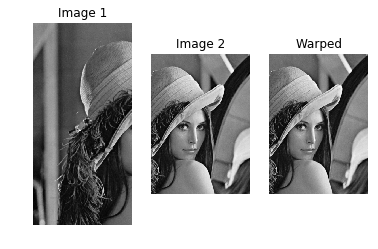

In [39]:
#warp the image using the homogrpahy and stitch
result = rsc.warp(h, image_1, image_2)
rsc.show_result(image_1, image_2, result)

We can see that the algorithm has correctly stitched the images together.

## Example 2 - Roatation Only

Let us consider a second example. A dummy shape has been created in paint. It has been designed such that the corners and edges of the object look similar.

(-0.5, 526.5, 335.5, -0.5)

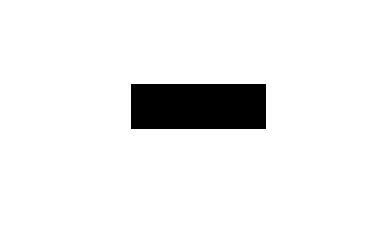

In [40]:
image_1 = plt.imread(r'../images/box.png')[:,:,0] * 255
plt.imshow(image_1)
plt.gray()
plt.axis('off')

(-0.5, 403.5, 251.5, -0.5)

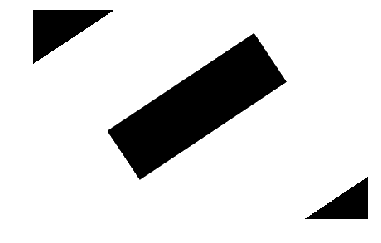

In [41]:
image_2 = plt.imread(r'../images/box2.png')[:,:,0] * 255
plt.imshow(image_2)
plt.gray()
plt.axis('off')

Although image stitching does not actually make sense here, since we have a full view of the object in both images, we want to investigate whether the keypoints in image 1 can be correctly matched to the keypoints in image 2. We set run_localisation = False, because otherwise all of the keypoints will be rejected since all of them will appear on an edge in this case.

In [42]:
det1 = keypoint_detector(image_1, number_of_octaves = 6, number_of_k_per_octave = 12)
det1.run_localisation = False
det1.get_keypoints()
kps_1 = det1.keypoints_scaled


Finding keypoints for channel: 0...
Applying initial blur...
Scaling keypoints to original scale...


In [43]:
print("There are " + str(len(kps_1)) + " keypoints in image 2.")

There are 32 keypoints in image 2.


Observe the keypoints:

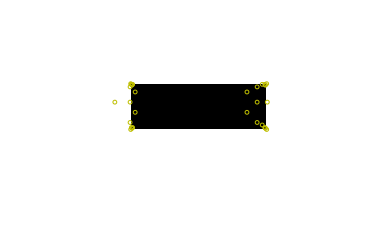

In [44]:
ut.plot_keypoints(det1.original_image, kps_1)

Looks like the detector was able to find reasonable keypoints. The keypoints "inside" the shape are because of rescaling the keypoints from a high level in the pyramid.

In [45]:
det2 = keypoint_detector(image_2, number_of_octaves = 6, number_of_k_per_octave = 12)
det2.run_localisation = False
det2.get_keypoints()
kps_2 = det2.keypoints_scaled


Finding keypoints for channel: 0...
Applying initial blur...
Scaling keypoints to original scale...


In [46]:
print("There are " + str(len(kps_2)) + " keypoints in image 2.")

There are 1403 keypoints in image 2.


Observe the keypoints:

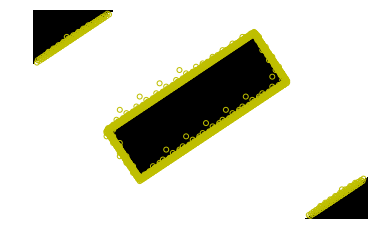

In [49]:
ut.plot_keypoints(det2.original_image, kps_2)

Now lets look at how the descriptors will match up.

In [50]:
h, matching_keypoints, matching_idx = rs.ransac(kps_1, kps_2, ratio_threshold=2, dist_threshold=17)

there are 6 matching keypoints.
The homography has 66 percent inliers.
The best homography has 66 percent inliers.


In the below chart we examine which keypoint in image 1 matched a keypoint in image 2.

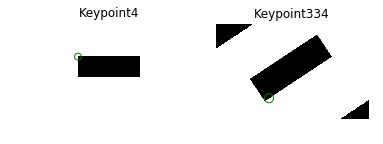

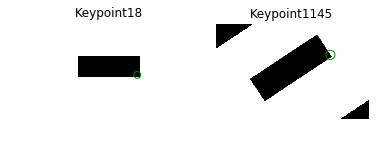

In [53]:
for p in matching_keypoints.keys():
    if p < 20:
       rs.illustrate_keypoint_matching(image_1, image_2, kps_1, kps_2, p)

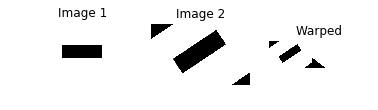

In [54]:
result = rs.warp(h, image_1, image_2)
rs.show_result(image_1, image_2, result)

It appears that the descriptors were able to pick up that there was rotation in the object, and the stitch has worked properly.

# Example 3 - A Simple Grayscale Panorama

Let us consider some real photos to reconstruct a panaroma. Warning: may take a few minutes to run.

(-0.5, 1023.5, 682.5, -0.5)

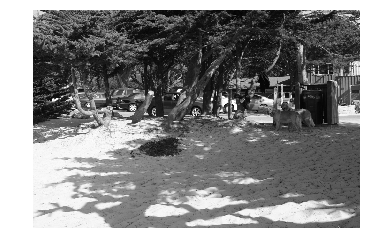

In [3]:
image_1 = plt.imread(r'../images/carmel-00.png') *255
plt.imshow(image_1)
plt.gray()
plt.axis('off')

Note: observe that there are two dogs on the right side of the image. Also not much bushes on the left side of the image.

In [4]:
#Detect the keypoints - takes about 5 minutes
det1 = keypoint_detector(image_1, number_of_octaves = 6, number_of_k_per_octave = 12)
det1.get_keypoints()
kps_1 = det1.keypoints_scaled


Finding keypoints for channel: 0...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 2% complete. 
Keypoint evaluation 4% complete. 
Keypoint evaluation 6% complete. 
Keypoint evaluation 8% complete. 
Keypoint evaluation 10% complete. 
Keypoint evaluation 12% complete. 
Keypoint evaluation 14% complete. 
Keypoint evaluation 16% complete. 
Keypoint evaluation 17% complete. 
Keypoint evaluation 19% complete. 
Keypoint evaluation 21% complete. 
Keypoint evaluation 23% complete. 
Keypoint evaluation 25% complete. 
Keypoint evaluation 27% complete. 
Keypoint evaluation 29% complete. 
Keypoint evaluation 31% complete. 
Keypoint evaluation 33% complete. 
Keypoint evaluation 34% complete. 
Keypoint evaluation 36% complete. 
Keypoint evaluation 38% complete. 
Keypoint evaluation 40% complete. 
Keypoint evaluation 42% complete. 
Keypoint evaluation 44% complete. 
Keypoint evaluation 46% complete. 
Keypoint evaluation 48% complete. 
Keypoint evaluation 50% complete.

(-0.5, 1023.5, 682.5, -0.5)

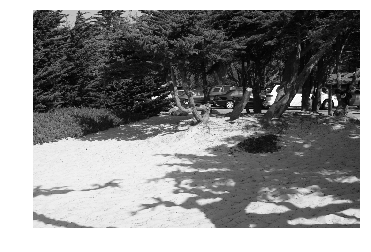

In [5]:
image_2 = plt.imread(r'../images/carmel-01.png') * 255
plt.imshow(image_2)
plt.gray()
plt.axis('off')

Observe that the dogs are gone, and we have more bushes on the left side.

In [6]:
det2 = keypoint_detector(image_2, number_of_octaves = 6, number_of_k_per_octave = 12)
det2.get_keypoints()
kps_2 = det2.keypoints_scaled


Finding keypoints for channel: 0...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 2% complete. 
Keypoint evaluation 4% complete. 
Keypoint evaluation 6% complete. 
Keypoint evaluation 8% complete. 
Keypoint evaluation 10% complete. 
Keypoint evaluation 12% complete. 
Keypoint evaluation 14% complete. 
Keypoint evaluation 16% complete. 
Keypoint evaluation 18% complete. 
Keypoint evaluation 19% complete. 
Keypoint evaluation 21% complete. 
Keypoint evaluation 23% complete. 
Keypoint evaluation 25% complete. 
Keypoint evaluation 27% complete. 
Keypoint evaluation 29% complete. 
Keypoint evaluation 31% complete. 
Keypoint evaluation 33% complete. 
Keypoint evaluation 35% complete. 
Keypoint evaluation 36% complete. 
Keypoint evaluation 38% complete. 
Keypoint evaluation 40% complete. 
Keypoint evaluation 42% complete. 
Keypoint evaluation 44% complete. 
Keypoint evaluation 46% complete. 
Keypoint evaluation 48% complete. 
Keypoint evaluation 50% complete.

Now let us match the keypoints with the descriptors.

In [7]:
h1, matching_keypoints, idx = rs.ransac(kps_1, kps_2, max_iter=10000,ratio_threshold=5, dist_threshold=8, inlier_tolerance = 1)
result = rs.warp(h1, image_1, image_2)

there are 1824 matching keypoints.
The homography has 0 percent inliers.
The homography has 0 percent inliers.
The best homography has 0 percent inliers.
The homography has 0 percent inliers.
The best homography has 0 percent inliers.
The homography has 7 percent inliers.
The best homography has 7 percent inliers.
The homography has 17 percent inliers.
The best homography has 17 percent inliers.
The homography has 19 percent inliers.
The best homography has 19 percent inliers.
The homography has 22 percent inliers.
The best homography has 22 percent inliers.
The homography has 22 percent inliers.
The best homography has 22 percent inliers.
The homography has 24 percent inliers.
The best homography has 24 percent inliers.
The homography has 26 percent inliers.
The best homography has 26 percent inliers.
The homography has 28 percent inliers.
The best homography has 28 percent inliers.
The homography has 29 percent inliers.
The best homography has 29 percent inliers.
The homography has 3

(-0.5, 1389.5, 682.5, -0.5)

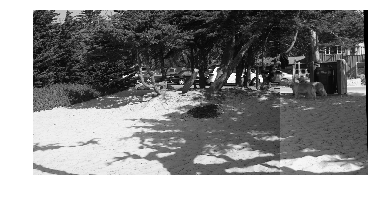

In [60]:
plt.imshow(result)
plt.gray()
plt.axis('off')

The algorithm was a success. Let us attempt the same thing without the descriptors.

In [15]:
h_, matching_keypoints_= rsc.ransac(kps_1, kps_2, max_iter=10000, inlier_threshold = 1)

0% complete
Best homography has 65 inliers which is 1%.
Best homography has 345 inliers which is 10%.
Best homography has 954 inliers which is 27%.
Best homography has 1867 inliers which is 54%.
1% complete
Best homography has 3425 inliers which is 99%.


In [16]:
result = rsc.warp(h_, image_1, image_2)

(-0.5, 1999.5, 749.5, -0.5)

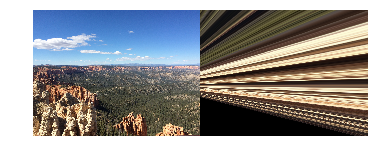

In [17]:
plt.imshow(result)
plt.gray()
plt.axis('off')

Observe that the result is non-sensical. Please see the report for the detail. We can conclude that the RANSAC algorithm with descriptor matching performs better than RANSAC without descriptor matching.

# Example 3 - Colour Panorama

(-0.5, 999.5, 749.5, -0.5)

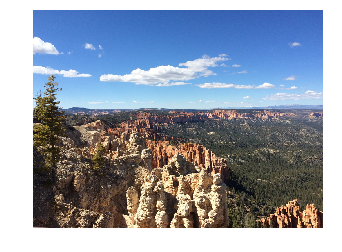

In [10]:
image_1 = (plt.imread(r'../images/bryce_left_01.png') *255).astype(np.uint8)
plt.imshow(image_1)
plt.axis('off')

(-0.5, 999.5, 749.5, -0.5)

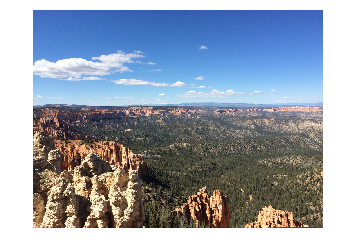

In [11]:
image_2 = (plt.imread(r'../images/bryce_right_01.png') *255).astype(np.uint8)
plt.imshow(image_2)
plt.axis('off')

In [12]:
#detect the keypoints
det1 = keypoint_detector(image_1, number_of_octaves = 6, number_of_k_per_octave = 12)
det1.get_keypoints()
kps_1 = det1.keypoints_scaled

det2 = keypoint_detector(image_2, number_of_octaves = 6, number_of_k_per_octave = 12)
det2.get_keypoints()
kps_2 = det2.keypoints_scaled


Finding keypoints for channel: 0...
Applying initial blur...
Keypoint evaluation 1% complete. 
Keypoint evaluation 2% complete. 
Keypoint evaluation 4% complete. 
Keypoint evaluation 5% complete. 
Keypoint evaluation 7% complete. 
Keypoint evaluation 8% complete. 
Keypoint evaluation 10% complete. 
Keypoint evaluation 11% complete. 
Keypoint evaluation 13% complete. 
Keypoint evaluation 14% complete. 
Keypoint evaluation 16% complete. 
Keypoint evaluation 17% complete. 
Keypoint evaluation 19% complete. 
Keypoint evaluation 20% complete. 
Keypoint evaluation 22% complete. 
Keypoint evaluation 23% complete. 
Keypoint evaluation 25% complete. 
Keypoint evaluation 26% complete. 
Keypoint evaluation 28% complete. 
Keypoint evaluation 29% complete. 
Keypoint evaluation 31% complete. 
Keypoint evaluation 32% complete. 
Keypoint evaluation 34% complete. 
Keypoint evaluation 35% complete. 
Keypoint evaluation 37% complete. 
Keypoint evaluation 38% complete. 
Keypoint evaluation 40% complete. 

Keypoint evaluation 15% complete. 
Keypoint evaluation 17% complete. 
Keypoint evaluation 18% complete. 
Keypoint evaluation 20% complete. 
Keypoint evaluation 21% complete. 
Keypoint evaluation 23% complete. 
Keypoint evaluation 24% complete. 
Keypoint evaluation 26% complete. 
Keypoint evaluation 27% complete. 
Keypoint evaluation 29% complete. 
Keypoint evaluation 30% complete. 
Keypoint evaluation 32% complete. 
Keypoint evaluation 33% complete. 
Keypoint evaluation 35% complete. 
Keypoint evaluation 36% complete. 
Keypoint evaluation 38% complete. 
Keypoint evaluation 39% complete. 
Keypoint evaluation 41% complete. 
Keypoint evaluation 42% complete. 
Keypoint evaluation 44% complete. 
Keypoint evaluation 45% complete. 
Keypoint evaluation 47% complete. 
Keypoint evaluation 48% complete. 
Keypoint evaluation 50% complete. 
Keypoint evaluation 51% complete. 
Keypoint evaluation 53% complete. 
Keypoint evaluation 54% complete. 
Keypoint evaluation 56% complete. 
Keypoint evaluation 

In [13]:
#using the descriptors to find the homography
h1, matching_keypoints1, idx = rs.ransac(kps_2, kps_1, max_iter=10000,ratio_threshold=5, dist_threshold=8, inlier_tolerance = 1)
result = rs.warp(h1, image_2, image_1)

there are 82 matching keypoints.
The homography has 6 percent inliers.
The best homography has 6 percent inliers.
The homography has 35 percent inliers.
The best homography has 35 percent inliers.
The homography has 43 percent inliers.
The best homography has 43 percent inliers.
The homography has 48 percent inliers.
The best homography has 48 percent inliers.
The homography has 51 percent inliers.
The best homography has 51 percent inliers.
The homography has 53 percent inliers.
The best homography has 53 percent inliers.
The homography has 58 percent inliers.
The best homography has 58 percent inliers.


(-0.5, 1511.5, 749.5, -0.5)

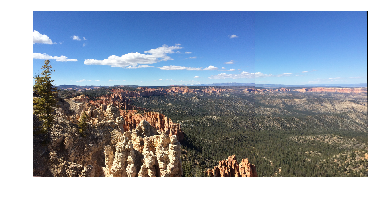

In [14]:
plt.imshow(result)
plt.axis('off')

We can see that the warp has worked correctly in stitching the two images together.

# Tips for running other images

1) Make sure the images are not floatin point and that the dynamic range is from 0 to 255.

2) For images larger than 300 x 500 x n, it may take up to 30 minutes to run.

3) In the RANSAC() function you may need to tune some of the parameters (see examples above).

4) In the RANSAC() and warp() parameters you may need to change the order in which you pass the images, since the warp sometimes would give a lot of black space if the order of the parameters is not correct.